In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## **Exploratory Data analysis (EDA)**
Data variables | Definition | Key
--- | --- | ---
survival | Survival | 0 = No, 1 = Yes
pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd
sex | Sex	
Age | Age in years	
sibsp | # of siblings / spouses aboard the Titanic	
parch | # of parents / children aboard the Titanic	
ticket | Ticket number	
fare | Passenger fare	
cabin | Cabin number	
embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton




In [2]:
# Import train and test data
train_data = pd.read_csv("/content/train.csv")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Train dataset : Missing data
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

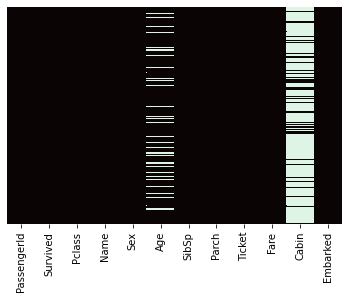

In [6]:
# using seaborn's heatmap to visualise missing data
import seaborn as sns
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False, cmap ='mako')
plt.show()

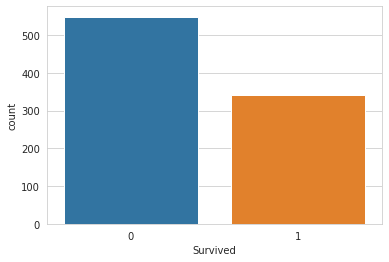

In [7]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',data=train_data)
plt.show()

More people who didnt survive as compared to survive

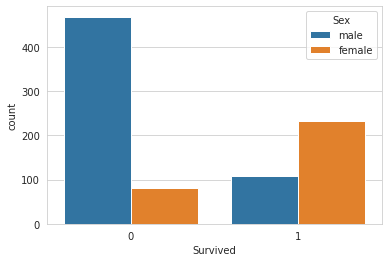

In [8]:
sns.set_style("whitegrid")
sns.countplot(x='Survived', hue='Sex',data=train_data)
plt.show()

Female seems to have a higher chance of surviving

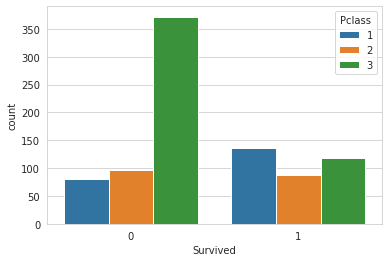

In [9]:
sns.countplot(x='Survived', hue='Pclass',data=train_data)
plt.show()

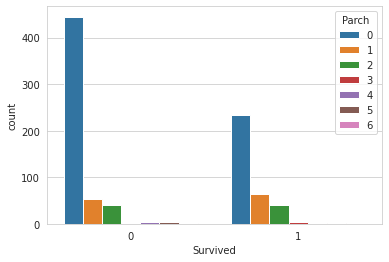

In [10]:
sns.countplot(x='Survived', hue='Parch',data=train_data)
plt.show()

People in Pclass 3 seems to have a lower chance of survival while people in Pclass 1 have better odds.

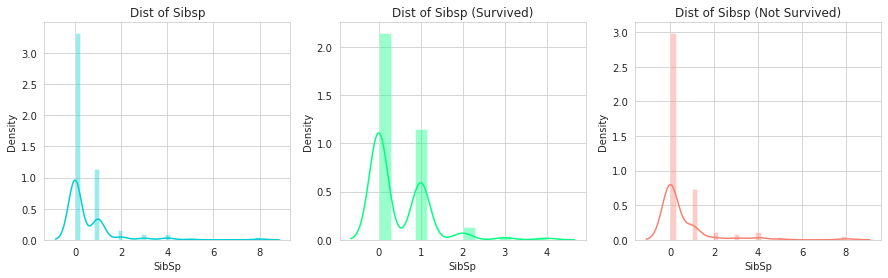

In [11]:
fig, axs = plt.subplots(1,3,figsize=(15,4))
axs[0].set_title('Dist of Sibsp')
sns.distplot(train_data.SibSp, ax=axs[0], color='darkturquoise')
axs[1].set_title('Dist of Sibsp (Survived)')
sns.distplot(train_data[train_data['Survived'] == 1].SibSp, ax=axs[1], color='springgreen')
axs[2].set_title('Dist of Sibsp (Not Survived)')
sns.distplot(train_data[train_data['Survived'] == 0].SibSp, ax=axs[2], color='salmon')
plt.show()

Most passangers do not have sibilings or spouse.

People with lesser or 1 sibsp seems to have a beter chance of surviviing.

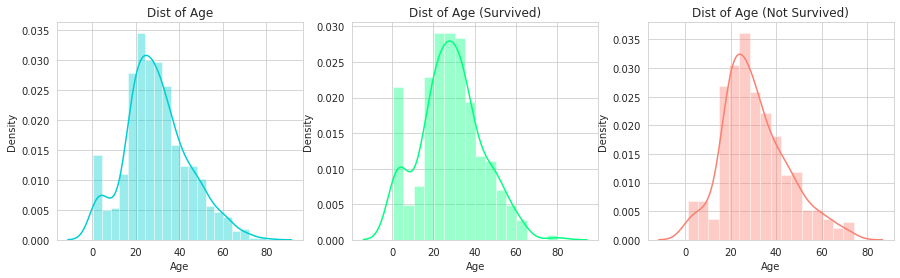

In [12]:
fig, axs = plt.subplots(1,3,figsize=(15,4))
axs[0].set_title('Dist of Age')
sns.distplot(train_data.Age, ax=axs[0], color='darkturquoise')
axs[1].set_title('Dist of Age (Survived)')
sns.distplot(train_data[train_data['Survived'] == 1].Age, ax=axs[1], color='springgreen')
axs[2].set_title('Dist of Age (Not Survived)')
sns.distplot(train_data[train_data['Survived'] == 0].Age, ax=axs[2], color='salmon')
plt.show()

Seems like children have a good chance of survivial

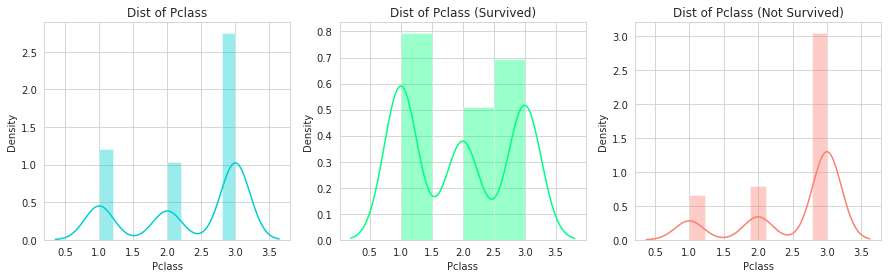

In [13]:
fig, axs = plt.subplots(1,3,figsize=(15,4))
axs[0].set_title('Dist of Pclass')
sns.distplot(train_data.Pclass, ax=axs[0], color='darkturquoise')
axs[1].set_title('Dist of Pclass (Survived)')
sns.distplot(train_data[train_data['Survived'] == 1].Pclass, ax=axs[1], color='springgreen')
axs[2].set_title('Dist of Pclass (Not Survived)')
sns.distplot(train_data[train_data['Survived'] == 0].Pclass, ax=axs[2], color='salmon')
plt.show()

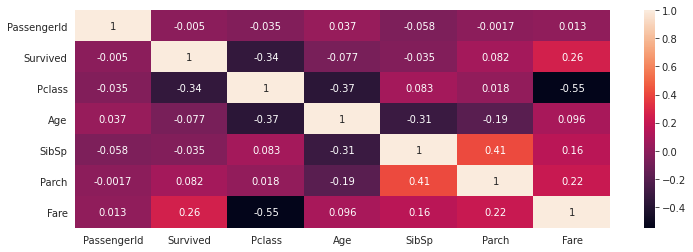

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
sns.heatmap(train_data.corr(),annot=True)
plt.show()

Age has a strong correlation with Pclass. 

Can consider using Pclass to fill in missing Age values. 

However, titles in their names may also be a decent indicator of age.

Will be proceeding with using titles to predict missing age in the data preprocessing section.

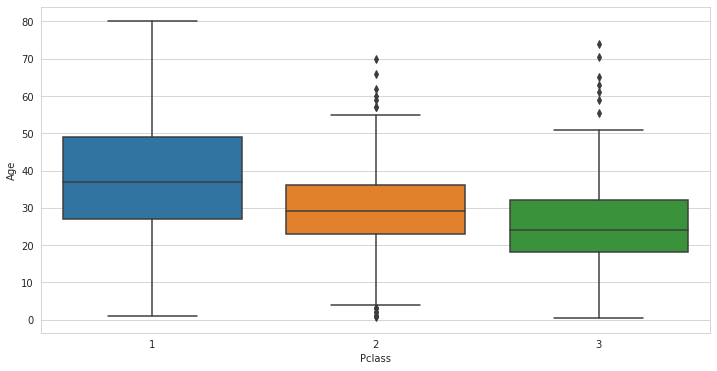

In [15]:
plt.figure(figsize =(12,6))
sns.boxplot(x='Pclass', y='Age',data=train_data)
plt.show()

Age generally decreases from Pclass 1 to 3. 

### **EDA Conclusion**

*   Female, children and Pclass1 have a better chance of survival
*   Missing data in Age and Cabin:
        *   Some correlation between Pclass, Sibsp and Age. 
            They maybe used to estimate missing age. 
            However, out of curiosity, I will be using Name Tiles (Mr, Mrs, Dr, ...) to estimate missing Age.
        *   Cabin here refers to Cabin ID.
            Assumes ID have little to no impact on survival of passangers.
            If There is any impact, assumes that it is already reflected in Pclass representing better cabins in general.














## **Data Preprocessing**

In [16]:
train_data.drop("PassengerId", axis=1, inplace=True)
train_data.head()
# PassengerId is just indexing, shouldnt help in prediction of survival.
# Drop PassengerID

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
# Train dataset: Replacing names with just the title
train_data['Title'] = train_data['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
titles = train_data['Title'].unique()
titles

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [18]:
# Get median age of each title
median_age = {}
for title in titles:
    median = train_data.Age[(train_data['Age'].notnull()) & (train_data['Title'] == title)].median()
    median_age[title] = median
    
median_age

{'Capt': 70.0,
 'Col': 58.0,
 'Don': 40.0,
 'Dr': 46.5,
 'Jonkheer': 38.0,
 'Lady': 48.0,
 'Major': 48.5,
 'Master': 3.5,
 'Miss': 21.0,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 30.0,
 'Mrs': 35.0,
 'Ms': 28.0,
 'Rev': 46.5,
 'Sir': 49.0,
 'the Countess': 33.0}

In [19]:
# Train dataset: Filling missing Age data with median of relative titles.
import math
# training data set
for index, row in train_data.iterrows():
    if math.isnan(row['Age']):
        train_data.loc[index,'Age'] = median_age[row['Title']]

In [20]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Title         0
dtype: int64

In [21]:
# Removing following features that i think shouldnt affect the prediction of survival
# Name(titles) : Most important feature of title is already represented in Age and Sex
# Ticket, Fare and Cabin: These should already be represented in Pclass
# Embarked: Places passangers depart from shouldnt predict their survival even is there is a correlation

removal_list =['Name', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title']
train_data.drop(removal_list, axis=1, inplace=True)

In [22]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [23]:
# Train dataset: change Sex categorical data to numerical
train_data = pd.get_dummies(train_data,drop_first=True)
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


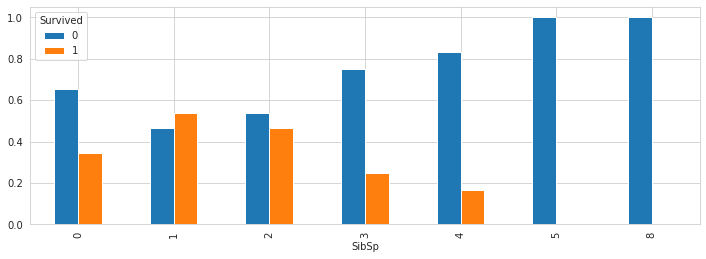

In [24]:
# plotting percentages of survival based on their SibSp.
names_survived = train_data.groupby("SibSp")['Survived'].value_counts(normalize=True).unstack()
names_survived.plot(kind='bar',figsize=(12,4))

In [25]:
# Encoder for SibSp
sibsp_encoder = {
    8:0,
    5:0,
    4:1,
    3:2,
    0:3,
    2:4,
    1:5
}

# Train dataset: Encoding SibSp
train_data['SibSp'] = train_data['SibSp'].apply(lambda x: sibsp_encoder[x])
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_male
0,0,3,22.0,5,0,1
1,1,1,38.0,5,0,0
2,1,3,26.0,3,0,0
3,1,1,35.0,5,0,0
4,0,3,35.0,3,0,1


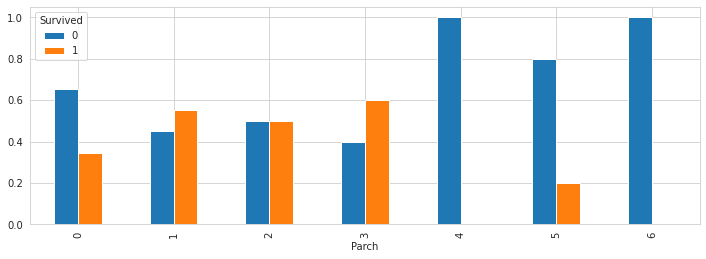

In [26]:
# plotting percentages of survival based on their Parch.
names_survived = train_data.groupby("Parch")['Survived'].value_counts(normalize=True).unstack()
names_survived.plot(kind='bar',figsize=(12,4))

In [27]:
# Encoder for Parch
Parch_encoder = {
    6:0,
    4:0,
    5:1,
    0:2,
    2:3,
    1:4,
    3:5
}

# Train dataset: Encoding Parch
train_data['Parch'] = train_data['Parch'].apply(lambda x: Parch_encoder[x])
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_male
0,0,3,22.0,5,2,1
1,1,1,38.0,5,2,0
2,1,3,26.0,3,2,0
3,1,1,35.0,5,2,0
4,0,3,35.0,3,2,1


In [28]:
# Target and feature split
X_train = train_data.iloc[:,1:].values
Y_train = train_data.iloc[:,0].values

In [29]:
# scaling numerical values
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer 

transformer = make_column_transformer((StandardScaler(),[0,1,2,3]), remainder = 'passthrough')
X_train = transformer.fit_transform(X_train)

In [30]:
X_train[:10]

array([[ 0.82737724, -0.55741976,  1.57610866, -0.46880661,  1.        ],
       [-1.56610693,  0.64941006,  1.57610866, -0.46880661,  0.        ],
       [ 0.82737724, -0.25571231, -0.3962408 , -0.46880661,  0.        ],
       [-1.56610693,  0.42312947,  1.57610866, -0.46880661,  0.        ],
       [ 0.82737724,  0.42312947, -0.3962408 , -0.46880661,  1.        ],
       [ 0.82737724,  0.04599515, -0.3962408 , -0.46880661,  1.        ],
       [-1.56610693,  1.85623989, -0.3962408 , -0.46880661,  1.        ],
       [ 0.82737724, -2.06595705, -1.38241553,  2.17490662,  1.        ],
       [ 0.82737724, -0.18028544, -0.3962408 ,  0.85305001,  0.        ],
       [-0.36936484, -1.16083468,  1.57610866, -0.46880661,  0.        ]])

## **Model Training**

In [31]:
# Training models
def models(X_train,y_train):
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression()
    log.fit(X_train,y_train)
    
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2)
    knn.fit(X_train,y_train)
    
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy')
    tree.fit(X_train,y_train)
    
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5)
    forest.fit(X_train,y_train)
    
    print('Score of log = ', round(log.score(X_train,y_train)*100,2),'%')
    print('Score of knn = ', round(knn.score(X_train,y_train)*100,2),'%')
    print('Score of tree = ', round(tree.score(X_train,y_train)*100,2),'%')
    print('Score of forest = ', round(forest.score(X_train,y_train)*100,2),'%')
    
    return log, knn, tree, forest

In [32]:
model = models(X_train, Y_train)

Score of log =  80.81 %
Score of knn =  84.74 %
Score of tree =  91.92 %
Score of forest =  84.29 %
